In [ ]:
import pandas
from itertools import product
import sys, argparse, os
import numpy as np
from math import log, ceil
from scipy.stats import multinomial, chi2
from math import factorial
import re

In [ ]:
folder_list = ['Bergsten_2013', 'Broughton_2013', 'Brown_2012', 'Cannon_2016_dna']

In [3]:
dic={'A':'1', 'T':'2', 'C':'3', 'G':'4', '-':'0', '?':'0'}

In [4]:
all_dists_list = []
all_data_list = []

In [5]:
all_seq_data = np.zeros((100,1000,1))

In [6]:
# data preprocessing
for folder in folder_list:
    file_path = './training/' + folder + '/'
    files_list = os.listdir(file_path)
    for file in files_list:
        if file.find('.nex.treefile.dist') > 0:
            file_base_name = file[0:file.find('.nex.treefile.dist')]
            print("******************")
            print(file_base_name)
            seq_data_raw = open(file_path+file_base_name+'.nex')
            seq_data = seq_data_raw.readlines()[6:]
            all_seq_data_list = []
            all_seq_data = np.zeros((100,1000))
            for idx, line in enumerate(seq_data):
                curr_line = line.split()
                if len(curr_line) < 2:
                    break
                seq_data_str = curr_line[1]
#                 print('===============')
                for item in dic:
                    seq_data_str = seq_data_str.replace(item, dic[item])
                #replace any remaining letter chars with 0                
                seq_data_str = re.sub(r'[A-Z]', r'0', seq_data_str)
                seq_data_list = list(seq_data_str)
                if len(seq_data_list) > 1000:
                    seq_data_list = seq_data_list[0:999]
                all_seq_data[idx,0:len(seq_data_list)] = seq_data_list
            all_data_list.append(all_seq_data.T)

******************
alignment_COI_2ndpos-out
******************
alignment_H3_3rdpos-out
******************
alignment_COI_1stpos-out
******************
alignment_18S-out
******************
alignment_16S-out
******************
alignment_H3_2ndpos-out
******************
alignment_H3_1stpos-out
******************
alignment_COI_3rdpos-out
******************
alignment_sacsl_2ndpos-out
******************
alignment_kbtbd4_3rdpos-out
******************
alignment_plagl2_2ndpos-out
******************
alignment_apc2_1stpos-out
******************
alignment_zic1_2ndpos-out
******************
alignment_kiaal_3rdpos-out
******************
alignment_myh6_3rdpos-out
******************
alignment_gpr85_2ndpos-out
******************
alignment_rag1_2ndpos-out
******************
alignment_ptchd4_2ndpos-out
******************
alignment_snx33_3rdpos-out
******************
alignment_snx33_1stpos-out
******************
alignment_btbd7_3rdpos-out
******************
alignment_ryr3_1stpos-out
******************
alig

******************
alignment_ALICUT_0327_1stpos-out
******************
alignment_ALICUT_0189_2ndpos-out
******************
alignment_ALICUT_0689_1stpos-out
******************
alignment_ALICUT_0961_1stpos-out
******************
alignment_ALICUT_0975_1stpos-out
******************
alignment_ALICUT_0372_2ndpos-out
******************
alignment_ALICUT_0651_1stpos-out
******************
alignment_ALICUT_0729_1stpos-out
******************
alignment_ALICUT_0703_1stpos-out
******************
alignment_ALICUT_0978_1stpos-out
******************
alignment_ALICUT_0455_2ndpos-out
******************
alignment_ALICUT_0942_1stpos-out
******************
alignment_ALICUT_0624_1stpos-out
******************
alignment_ALICUT_0261_2ndpos-out
******************
alignment_ALICUT_0049_2ndpos-out
******************
alignment_ALICUT_0950_1stpos-out
******************
alignment_ALICUT_0994_1stpos-out
******************
alignment_ALICUT_0314_2ndpos-out
******************
alignment_ALICUT_0131_2ndpos-out
************

******************
alignment_ALICUT_0856_2ndpos-out
******************
alignment_ALICUT_0843_1stpos-out
******************
alignment_ALICUT_0552_2ndpos-out
******************
alignment_ALICUT_0443_1stpos-out
******************
alignment_ALICUT_0157_2ndpos-out
******************
alignment_ALICUT_0483_2ndpos-out
******************
alignment_ALICUT_0407_2ndpos-out
******************
alignment_ALICUT_0126_2ndpos-out
******************
alignment_ALICUT_0614_2ndpos-out
******************
alignment_ALICUT_0801_2ndpos-out
******************
alignment_ALICUT_0346_2ndpos-out
******************
alignment_ALICUT_0582_2ndpos-out
******************
alignment_ALICUT_0724_1stpos-out
******************
alignment_ALICUT_0140_1stpos-out
******************
alignment_ALICUT_0529_1stpos-out
******************
alignment_ALICUT_0647_2ndpos-out
******************
alignment_ALICUT_0105_1stpos-out
******************
alignment_ALICUT_0081_1stpos-out
******************
alignment_ALICUT_0115_2ndpos-out
************

In [7]:
# label preprocessing
for folder in folder_list:
    file_path = './training/' + folder + '/'
    files_list = os.listdir(file_path)
    for file in files_list:
        if file.find('.nex.treefile.dist') > 0:
            file_base_name = file[0:file.find('.nex.treefile.dist')]
            print("******************")
            print(file_base_name)
            seq_dists_raw = open(file_path+file_base_name+'.nex.treefile.dist')
            seq_dists = seq_dists_raw.readlines()[1:]
            all_seq_dists = np.zeros((100,100,1))
            for idx, line in enumerate(seq_dists):
                curr_line = line.split()
                if len(curr_line) < 2:
                    break
                dist_values_array = np.array(curr_line[1:])
                dist_values_array = dist_values_array.astype('float')
#                 print(dist_values_array)
#                 print(j)
                all_seq_dists[idx,0:dist_values_array.shape[0],0] = dist_values_array
            all_dists_list.append(all_seq_dists)
            print('all_seq_dists.shape: ', all_seq_dists.shape)
            print('*******************************')

******************
alignment_COI_2ndpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_H3_3rdpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_COI_1stpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_18S-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_16S-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_H3_2ndpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_H3_1stpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_COI_3rdpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_sacsl_2ndpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
*******

all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0054_2ndpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0433_1stpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0433_2ndpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0730_1stpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0345_1stpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0157_1stpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0381_2ndpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0890_2ndpos-out
all_seq_dists.shape:  (100, 100, 1)
****

all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0983_1stpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0049_1stpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0350_2ndpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0268_2ndpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_1027_2ndpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0974_2ndpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0686_1stpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0212_2ndpos-out
all_seq_dists.shape:  (100, 100, 1)
****

all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0362_1stpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0343_1stpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0601_2ndpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_1027_1stpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0314_1stpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0732_2ndpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0730_2ndpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0929_1stpos-out
all_seq_dists.shape:  (100, 100, 1)
****

all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0126_2ndpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0614_2ndpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0801_2ndpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0346_2ndpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0582_2ndpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0724_1stpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0140_1stpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0529_1stpos-out
all_seq_dists.shape:  (100, 100, 1)
****

all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0709_2ndpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0923_1stpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0632_1stpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0185_1stpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0645_1stpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0663_2ndpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0471_1stpos-out
all_seq_dists.shape:  (100, 100, 1)
*******************************
******************
alignment_ALICUT_0572_2ndpos-out
all_seq_dists.shape:  (100, 100, 1)
****

In [8]:
training_data = np.stack(all_data_list,axis=0)
training_dists = np.stack(all_dists_list,axis=0)
# training_data = training_data.reshape((500, 100, 1000))
training_dists = training_dists.reshape((500, 100, 100))
print('training_data.shape: ', training_data.shape)
print('training_dists.shape: ', training_dists.shape)

training_data.shape:  (500, 1000, 100)
training_dists.shape:  (500, 100, 100)


In [9]:
training_data[0][200]

array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Heatmap Visualization

In [10]:
from numpy import linalg as LA
import matplotlib.pyplot as plt

### Eigenvalue & Eigenvector

In [11]:
w, v = LA.eig(training_dists[50])

In [12]:
training_dists[50]

array([[0.       , 0.0230076, 0.200722 , ..., 0.       , 0.       ,
        0.       ],
       [0.0230076, 0.       , 0.177716 , ..., 0.       , 0.       ,
        0.       ],
       [0.200722 , 0.177716 , 0.       , ..., 0.       , 0.       ,
        0.       ],
       ...,
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
        0.       ]])

## DNA Sequence Heatmap

In [29]:
TRY_INDEX = 2

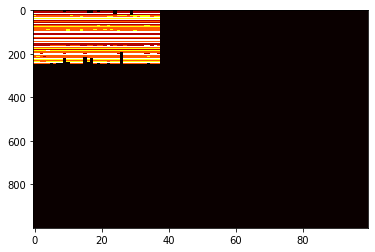

In [30]:
plt.imshow(training_data[TRY_INDEX], cmap='hot', interpolation='nearest', aspect='auto')
plt.show()

## DNA Sequence Dot Heatmap

In [35]:
dot_matrix = (training_data[TRY_INDEX].T).dot(training_data[TRY_INDEX])
# dot_matrix = np.outer(training_data[TRY_INDEX], training_data[TRY_INDEX].T)

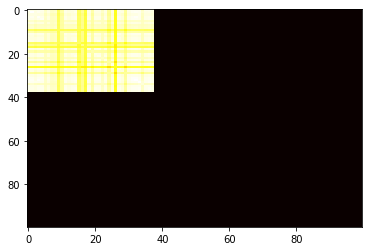

In [36]:
plt.imshow(dot_matrix, cmap='hot', interpolation='nearest', aspect='auto')
plt.show()

## Distance Matrix Heatmap

In [37]:
training_dists.shape

(500, 100, 100)

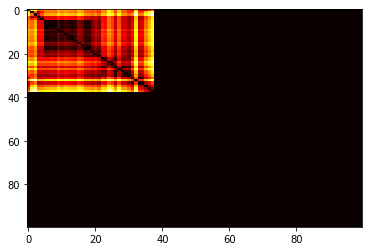

In [38]:
plt.imshow(training_dists[TRY_INDEX], cmap='hot', interpolation='nearest', aspect='auto')
plt.show()